In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [14]:
# Load the dataset (replace with actual path)
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [17]:
# Assuming df is your DataFrame
print("Checking for missing values:")
print(df.isnull().sum())  # Check for missing values in the dataset

# Fill missing values for numeric columns using median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns using mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are still missing values
print("\nMissing values after filling:")
print(df.isnull().sum())  # Verify that missing values are filled

# Encode the 'Gender' column as numerical (Male: 1, Female: 0)
# This assumes 'Gender' column contains either 'Male' or 'Female' strings
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Display the cleaned dataset
print("\nCleaned Data:")
print(df.head())


Checking for missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Missing values after filling:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Cleaned Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1     NaN   19                  15                      39
1           2     NaN   21                  15                      81
2           3     NaN   20                  16                       6
3           4     NaN   23                  16                      77
4           5     NaN   31                  17                      40


In [18]:
# Selecting relevant features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the data (important for K-means to avoid dominance of any single feature)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print("\nScaled Data:")
print(pd.DataFrame(X_scaled, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']).head())



Scaled Data:
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     NaN -1.424569           -1.738999               -0.434801
1     NaN -1.281035           -1.738999                1.195704
2     NaN -1.352802           -1.700830               -1.715913
3     NaN -1.137502           -1.700830                1.040418
4     NaN -0.563369           -1.662660               -0.395980


/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


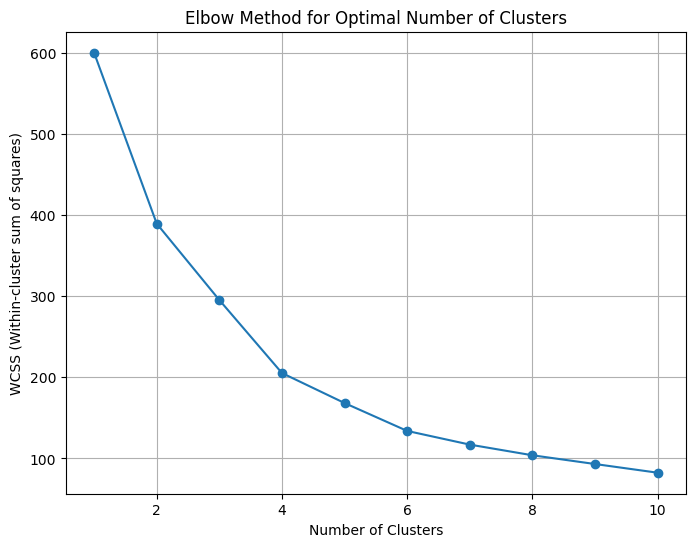

In [26]:
from sklearn.impute import SimpleImputer
# Create an imputer object that fills NaNs with the mean value
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the data
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Then proceed with your KMeans clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled_imputed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.grid(True)
plt.show()


In [28]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_scaled_cleaned = imputer.fit_transform(X_scaled)

# Apply K-Means clustering with the optimal number of clusters (determined from elbow method)
optimal_clusters = 5  # Replace this with the optimal number based on the elbow method

# Fit KMeans
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled_cleaned)

# Add the cluster label to the original dataset
df['Cluster'] = y_kmeans

# Display the clustered dataset
print("\nClustered Data:")
print(df.head())


/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



Clustered Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1     NaN   19                  15                      39   
1           2     NaN   21                  15                      81   
2           3     NaN   20                  16                       6   
3           4     NaN   23                  16                      77   
4           5     NaN   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


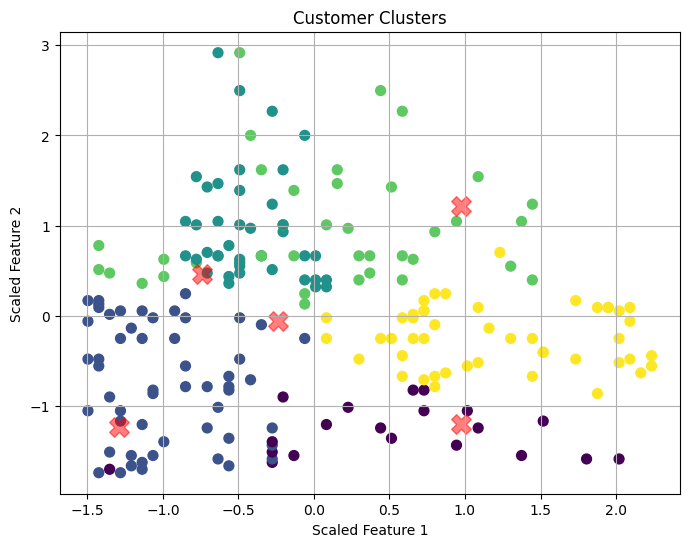

In [31]:
import matplotlib.pyplot as plt

# Visualize the clusters (using 'Annual Income' and 'Spending Score')
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.5, marker='X')

plt.title('Customer Clusters')
plt.xlabel('Scaled Feature 1')  # Replace with the appropriate label
plt.ylabel('Scaled Feature 2')  # Replace with the appropriate label
plt.grid(True)
plt.show()


In [34]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_scaled_clean = imputer.fit_transform(X_scaled)

# Calculate the silhouette score
sil_score = silhouette_score(X_scaled_clean, y_kmeans)
print(f"Silhouette Score: {sil_score}")


/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Silhouette Score: 0.41664341513732767
